<a href="https://colab.research.google.com/github/hydermbs/data_science_projects/blob/main/eda_pskistan_national_assembly_attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Dataset**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Attendence of Members - Sessions 1 - 20.xls to Attendence of Members - Sessions 1 - 20 (2).xls


In [14]:
data1 = pd.read_excel('Attendence of Members - Sessions 1 - 20.xls')
data1.head(15)

,NATIONAL ASSEMBLY SECRETARAIT,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,(Notice Office),NaN,NaN
1,"1st Joint Session held on Monday, the 17th Sep...",NaN,NaN,NaN
2,The following Mambers National Assembly of Pak...,NaN,NaN,NaN
3,Sl. No.,Constituency,Name of Member,Status
4,1,NA-1,Moulana Abdul Akbar Chitrali,P
5,2,NA-2,Dr. Haider Ali Khan,P
6,3,NA-3,Mr. Saleem Rehman,P
7,4,NA-4,Mr. Murad Saeed,P
8,5,NA-5,Sahibzada Sibghatullah,P
9,6,NA-6,Mr. Mehboob Shah,P


In [10]:
data1.shape

(37247, 4)

# **Rename Columns**

In [21]:
data1.rename(columns=({"Unnamed: 1":"Constituency","Unnamed: 2":"Member Name","Unnamed: 3":"Status"}),inplace=True)
data1.reset_index()
data1.drop([0,2],inplace=True)
data1

,NATIONAL ASSEMBLY SECRETARAIT,Constituency,Member Name,Status
4,1,NA-1,Moulana Abdul Akbar Chitrali,P
5,2,NA-2,Dr. Haider Ali Khan,P
6,3,NA-3,Mr. Saleem Rehman,P
7,4,NA-4,Mr. Murad Saeed,P
8,5,NA-5,Sahibzada Sibghatullah,P
...,...,...,...,...
37242,193,Reserved Seat,Ms. Shunila Ruth,P
37243,194,Reserved Seat,Mr. Ramesh Kumar Vankwani,P
37244,195,Reserved Seat,Mr. Jamshed Thomas,P
37245,196,Reserved Seat,Dr. Darshan,P


In [24]:
data1.isnull().sum()
data1.dropna(inplace=True)

In [38]:
data1['Status'].unique()

array(['P', 'Status'], dtype=object)

In [26]:
data1['Member Name'].nunique()

534

In [27]:
data1['Member Name'].unique()

array(['Moulana Abdul Akbar Chitrali', 'Dr. Haider Ali Khan',
       'Mr. Saleem  Rehman', 'Mr. Murad Saeed', 'Sahibzada Sibghatullah',
       'Mr. Mehboob Shah', 'Mr. Muhammad Bashir Khan', 'Mr. Junaid Akbar',
       'Mr. Sher Akbar Khan', 'Mr. Ibadullah Khan', 'Mr. Afreen Khan',
       'Prince Muhammad Nawaz Alai', 'Mr. Saleh Muhammad',
       'Mr. Muhammad Sajjad', 'Mr. Murtaza Javed Abbasi',
       'Mr. Ali Khan Jadoon', 'Mr. Omar Ayub Khan', 'Mr. Asad Qaiser',
       'Engr. Usman Khan  Tarakai', 'Mr. Mujahid Ali',
       'Mr. Ali Muhammad Khan', 'Malik Anwar Taj',
       'Mr. Fazal Muhammad Khan', 'Mr. Pervez Khattak',
       'Mr. Imran Khattak', 'Mr. Noor Alam Khan', 'Mr. Arbab Amir Ayub',
       'Mr. Nasir Khan Musa Zai', 'Mr. Sher Ali Arbab', 'Mr. Shaukat Ali',
       'Mr. Shehryar Afridi', 'Mr. Khial Zaman', 'Mr. Shahid Ahmad',
       'Mr. Muhammad Anwar', 'Mr. Asad Mehmood',
       'Mr. Muhammad Yaqoob Sheikh', 'Mr. Gul Dad khan',
       'Mr. Gul Zafar Khan', 'Mr. Sajid Khan'

In [58]:
#most Present MNAs
most_p = pd.DataFrame(data1[(data1.Status == 'P')].value_counts().nlargest())
most_p = most_p.reset_index()
most_p.rename(columns={0:'counts'},inplace=True)
most_p


,NATIONAL ASSEMBLY SECRETARAIT,Constituency,Member Name,Status,counts
0,1,NA-1,Moulana Abdul Akbar Chitrali,P,144
1,2,NA-2,Dr. Haider Ali Khan,P,87
2,4,NA-4,Mr. Murad Saeed,P,69
3,5,NA-5,Sahibzada Sibghatullah,P,65
4,3,NA-3,Mr. Saleem Rehman,P,63


Text(0.5, 1.0, 'MNAs WITH MOST ATTENDENCE')

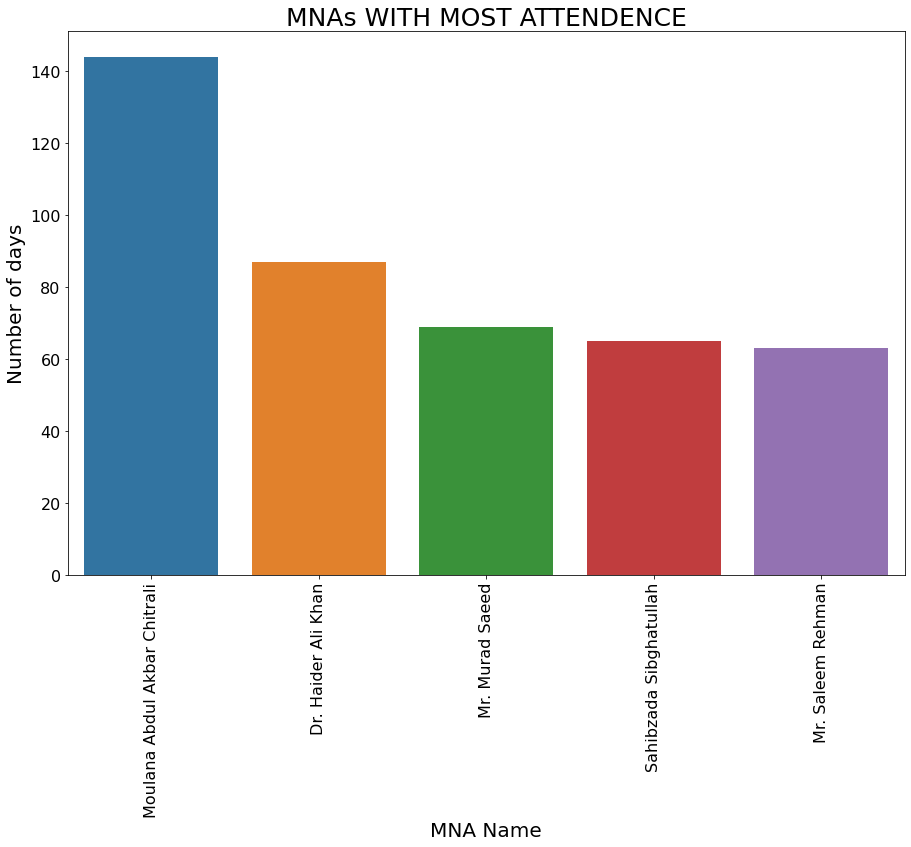

In [69]:
#MOST Present MNAs Bar plot
plt.figure(figsize=(15,10))
sns.barplot(x=most_p['Member Name'],y=most_p['counts'])
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('MNA Name',fontsize=20)
plt.ylabel('Number of days',fontsize=20)
plt.title('MNAs WITH MOST ATTENDENCE',fontsize=25)


In [78]:
#MNAs with less attendence
less_p = pd.DataFrame(data1[(data1.Status == 'P')].value_counts().nsmallest())
less_p = less_p.reset_index()
less_p.rename(columns={0:'counts'},inplace=True)
less_p

,NATIONAL ASSEMBLY SECRETARAIT,Constituency,Member Name,Status,counts
0,210,Reserve Seat,Ms. Wajiha Akram,P,1
1,210,NA-313,Ms. Shamim Ara Panhwar,P,1
2,65,NA-126,Mr. Muhammad Hammad Azhar,P,1
3,65,NA-125,Mr. Waheed Alam Khan,P,1
4,210,Reserved Seat,Dr. Darshan,P,1


Text(0.5, 1.0, 'MNAs WITH less ATTENDENCE')

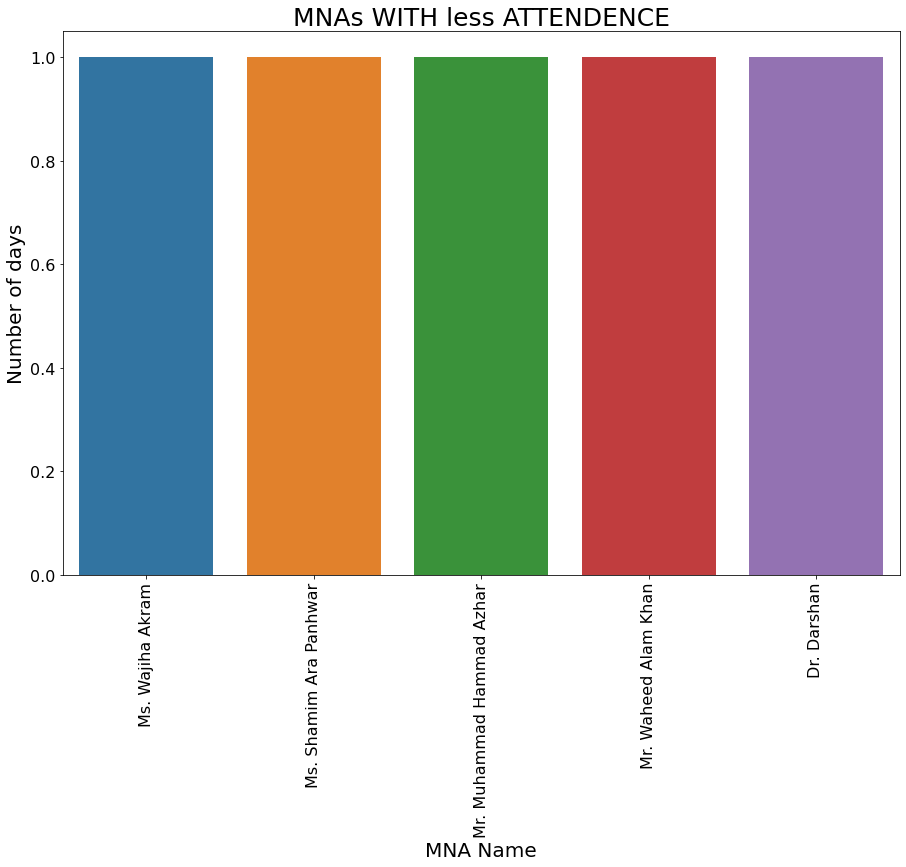

In [79]:
#less attendence MNAs Bar plot
plt.figure(figsize=(15,10))
sns.barplot(x=less_p['Member Name'],y=less_p['counts'])
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('MNA Name',fontsize=20)
plt.ylabel('Number of days',fontsize=20)
plt.title('MNAs WITH less ATTENDENCE',fontsize=25)

In [94]:
data1['Constituency'].replace({'Reserved Seat':'Reserved','Reserved Seats':'Reserved','Reserved Seate':'Reserved','Reserved Seat':'Reserved','Reserve Seat':'Reserved'},inplace=True)

In [95]:
#find reserved and NA members ratio
namembers = pd.DataFrame(data1[(data1['Constituency']!='Reserved')].value_counts()).reset_index()
reserved = pd.DataFrame(data1[(data1['Constituency']=='Reserved')].value_counts()).reset_index()
total_na=namembers['Member Name'].nunique()
total_res = reserved['Member Name'].nunique()

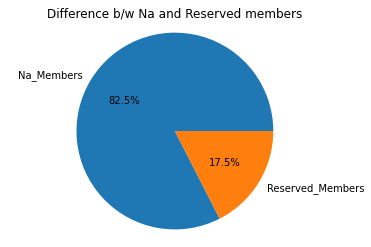

In [98]:
#Ratio in Pie Plot
values =  [total_na,total_res]
lables=["Na_Members","Reserved_Members"]
plt.pie(values,labels=lables,autopct='%1.1f%%')
plt.title("Difference b/w Na and Reserved members")
plt.axis('equal')
plt.show()    